In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split # Esta clase realiza la partición de datos en entrenamiento y prueba
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score # Método de validación cruzada para evaluar el desempeño un modelo

from sklearn.metrics import explained_variance_score # Se llama a una clase llamada explained_variance_score, el cual es
from sklearn.metrics import mean_absolute_error # Se llama a una clase llamada mean_absolute_error, el cual es
                                                # una métrica de error promedio absoluto

from sklearn.linear_model import LinearRegression # Algoritmo para crear el modelo de regresión lineal múltiple
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_percentage_error

from scipy.stats import iqr # Interquartile range
from sklearn.neighbors import LocalOutlierFactor # Algoritmo LOF
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid

# Correlación
# ==============================================================================
from scipy.stats import spearmanr


# Lectura de los datos

In [2]:
df_data = pd.read_csv('data_iteration_1.csv', index_col=0)
df_data = df_data.drop(columns=["index"])
df_data.head()

precio  baños_familiares  area_bruta  numero_niveles  parqueaderos   
0  1100000.0               1.0        95.0             1.0           0.0  \
1   950000.0               1.0        70.0             1.0           0.0   
2   970000.0               1.0        38.0             1.0           0.0   
3  1400000.0               1.0        50.0             1.0           1.0   
4   800000.0               1.0        92.0             1.0           0.0   

   alcobas_familiares  estrato  area_total  juegos_infantiles  balcon  ...   
0                 3.0      0.0        95.0                0.0     0.0  ...  \
1                 2.0      3.0        70.0                0.0     0.0  ...   
2                 1.0      4.0        38.0                0.0     0.0  ...   
3                 2.0      0.0        50.0                0.0     0.0  ...   
4                 3.0      2.0        92.0                0.0     1.0  ...   

   closet_de_linos  biblioteca  parqueadero_visitantes  gimnasio  piscina   
0              1.0         1.0                     0.0       0.0      0.0  \
1              0.0         0.0                     0.0       0.0      0.0   
2              1.0         0.0                     0.0       0.0      0.0   
3              1.0         1.0                     1.0       0.0      0.0   
4              0.0         0.0                     0.0       0.0      0.0   

   salon_social  dispositivos_automatizacion  alarma  tipo_cocina_freq   
0           0.0                          0.0     0.0          0.861534  \
1           0.0                          0.0     0.0          0.081652   
2           0.0                          0.0     0.0          0.081652   
3           0.0                          0.0     0.0          0.861534   
4           0.0                          0.0     0.0          0.861534   

   tipo_pisos_freq  
0         0.596709  
1         0.596709  
2         0.596709  
3         0.596709  
4         0.596709  

[5 rows x 37 columns]

## Tratamiento a variable precios

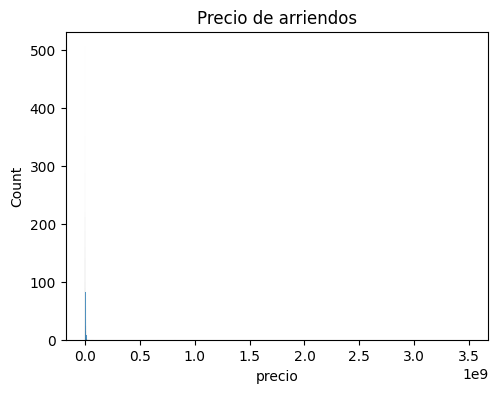

In [3]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('Precio de arriendos')
sns.histplot(df_data['precio'])
plt.show()


In [4]:
iqr = iqr(df_data.precio, axis = 0, rng = (25, 75), interpolation = 'midpoint')
print(iqr)

3200000.0


In [5]:
q1 = np.percentile(df_data.precio, 25)
q3 = np.percentile(df_data.precio, 75)

min_limite = q1 - 1.5*iqr
max_limite = q3 + 1.5*iqr

print(f"q1 {q1} q3 {q3}")
print("Límites inferiores = ", min_limite)
print("Límites superiores = ", max_limite)

q1 1500000.0 q3 4700000.0
Límites inferiores =  -3300000.0
Límites superiores =  9500000.0


In [6]:
df_data = df_data[(df_data['precio'] > 500000) & (df_data['precio'] <= 7500000)]
df_data.reset_index()

index     precio  baños_familiares  area_bruta  numero_niveles   
0         0  1100000.0               1.0        95.0             1.0  \
1         1   950000.0               1.0        70.0             1.0   
2         2   970000.0               1.0        38.0             1.0   
3         3  1400000.0               1.0        50.0             1.0   
4         4   800000.0               1.0        92.0             1.0   
...     ...        ...               ...         ...             ...   
2859   3227  1250000.0               2.0        57.0             1.0   
2860   3228  1100000.0               2.0        54.0             1.0   
2861   3229  1100000.0               1.0        50.0             1.0   
2862   3230  1000000.0               2.0        53.0             1.0   
2863   3231  1200000.0               2.0        52.0             1.0   

      parqueaderos  alcobas_familiares  estrato  area_total   
0              0.0                 3.0      0.0        95.0  \
1              0.0                 2.0      3.0        70.0   
2              0.0                 1.0      4.0        38.0   
3              1.0                 2.0      0.0        50.0   
4              0.0                 3.0      2.0        92.0   
...            ...                 ...      ...         ...   
2859           0.0                 3.0      3.0        57.0   
2860           1.0                 3.0      3.0        54.0   
2861           0.0                 2.0      3.0        50.0   
2862           1.0                 3.0      3.0        53.0   
2863           1.0                 3.0      3.0        52.0   

      juegos_infantiles  ...  closet_de_linos  biblioteca   
0                   0.0  ...              1.0         1.0  \
1                   0.0  ...              0.0         0.0   
2                   0.0  ...              1.0         0.0   
3                   0.0  ...              1.0         1.0   
4                   0.0  ...              0.0         0.0   
...                 ...  ...              ...         ...   
2859                1.0  ...              0.0         0.0   
2860                1.0  ...              0.0         0.0   
2861                1.0  ...              0.0         0.0   
2862                1.0  ...              1.0         0.0   
2863                1.0  ...              1.0         0.0   

      parqueadero_visitantes  gimnasio  piscina  salon_social   
0                        0.0       0.0      0.0           0.0  \
1                        0.0       0.0      0.0           0.0   
2                        0.0       0.0      0.0           0.0   
3                        1.0       0.0      0.0           0.0   
4                        0.0       0.0      0.0           0.0   
...                      ...       ...      ...           ...   
2859                     1.0       0.0      0.0           1.0   
2860                     1.0       0.0      1.0           1.0   
2861                     0.0       1.0      0.0           0.0   
2862                     1.0       0.0      1.0           1.0   
2863                     1.0       0.0      1.0           1.0   

      dispositivos_automatizacion  alarma  tipo_cocina_freq  tipo_pisos_freq  
0                             0.0     0.0          0.861534         0.596709  
1                             0.0     0.0          0.081652         0.596709  
2                             0.0     0.0          0.081652         0.596709  
3                             0.0     0.0          0.861534         0.596709  
4                             0.0     0.0          0.861534         0.596709  
...                           ...     ...               ...              ...  
2859                          0.0     0.0          0.861534         0.596709  
2860                          0.0     0.0          0.861534         0.596709  
2861                          0.0     0.0          0.081652         0.596709  
2862                          0.0     0.0          0.861534         0.596709  
2

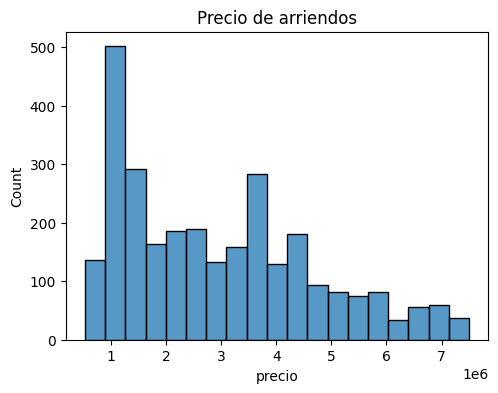

In [7]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('Precio de arriendos')
sns.histplot(df_data['precio'])
plt.show()

In [8]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2864 entries, 0 to 3231
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   precio                       2864 non-null   float64
 1   baños_familiares             2864 non-null   float64
 2   area_bruta                   2864 non-null   float64
 3   numero_niveles               2864 non-null   float64
 4   parqueaderos                 2864 non-null   float64
 5   alcobas_familiares           2864 non-null   float64
 6   estrato                      2864 non-null   float64
 7   area_total                   2864 non-null   float64
 8   juegos_infantiles            2864 non-null   float64
 9   balcon                       2864 non-null   float64
 10  zona_ropas                   2864 non-null   float64
 11  camaras_cctv                 2864 non-null   float64
 12  cancha_polideportiva         2864 non-null   float64
 13  ascensor               

In [9]:
df_data.shape

(2864, 37)

In [10]:
df_data.isna().sum()

precio                         0
baños_familiares               0
area_bruta                     0
numero_niveles                 0
parqueaderos                   0
alcobas_familiares             0
estrato                        0
area_total                     0
juegos_infantiles              0
balcon                         0
zona_ropas                     0
camaras_cctv                   0
cancha_polideportiva           0
ascensor                       0
cancha_squash                  0
zona_bbq                       0
patio                          0
unidad_cerrada_conjunto        0
zonas_verdes                   0
aire_acondicionado             0
jacuzzi                        0
red_de_Gas                     0
turco                          0
porteria_24_7                  0
sauna                          0
calentador_de_agua             0
terraza                        0
closet_de_linos                0
biblioteca                     0
parqueadero_visitantes         0
gimnasio  

## Separación de las variables

In [11]:
pred_columns = [
    'baños_familiares',
    'area_bruta', 
    'numero_niveles',
    'parqueaderos', 
    'alcobas_familiares', 
    'estrato', 
    'area_total',
    'juegos_infantiles', 
    'balcon', 
    'zona_ropas', 
    'camaras_cctv',
    'cancha_polideportiva', 
    'ascensor', 
    'cancha_squash', 
    'zona_bbq',
    'patio', 
    'unidad_cerrada_conjunto', 
    'zonas_verdes',
    'aire_acondicionado', 
    'jacuzzi', 
    'red_de_Gas', 
    'turco', 
    'porteria_24_7',
    'sauna', 
    'calentador_de_agua', 
    'terraza', 
    'closet_de_linos',
    'biblioteca', 
    'parqueadero_visitantes', 
    'gimnasio', 
    'piscina',
    'salon_social', 
    'dispositivos_automatizacion', 
    'alarma',
    'tipo_cocina_freq', 
    'tipo_pisos_freq'
]
cat_features = ['juegos_infantiles','balcon','zona_ropas','camaras_cctv','cancha_polideportiva','ascensor','cancha_squash','zona_bbq','patio','unidad_cerrada_conjunto','zonas_verdes',
                'aire_acondicionado','jacuzzi','red_de_Gas','turco','porteria_24_7','sauna','calentador_de_agua','terraza','closet_de_linos','biblioteca','parqueadero_visitantes',
                'gimnasio','piscina','salon_social','dispositivos_automatizacion','alarma']
cat_number_fetures = ['baños_familiares', 'numero_niveles', 'parqueaderos', 'alcobas_familiares', 'estrato']
num_features = ['area_bruta', 'area_total','tipo_cocina_freq','tipo_pisos_freq']

In [12]:
df_data = df_data.reset_index(drop=True)
X = df_data[pred_columns]
Y = df_data[['precio']]

In [13]:
X.shape, Y.shape

((2864, 36), (2864, 1))

##

## Distribución de los datos

In [14]:
def plot_dist(data, columns, method = "hist", fig_zise = (15,8), num_rows = 2, num_cols = 3):
    columns_type = columns
    fig, axs = plt.subplots(nrows=num_rows,ncols=num_cols)
    fig.set_figwidth(fig_zise[0])
    fig.set_figheight(fig_zise[1])
    col = 0
    for i in range(0, num_rows):    
        for j in range(0, 3):
            try:
                if method == "dist":
                    sns.scatterplot(data[columns_type[col]], ax=axs[i,j])
                else:
                    sns.histplot(data[columns_type[col]], ax=axs[i,j])
            except IndexError:
                continue
            col += 1

### Variables numéricas

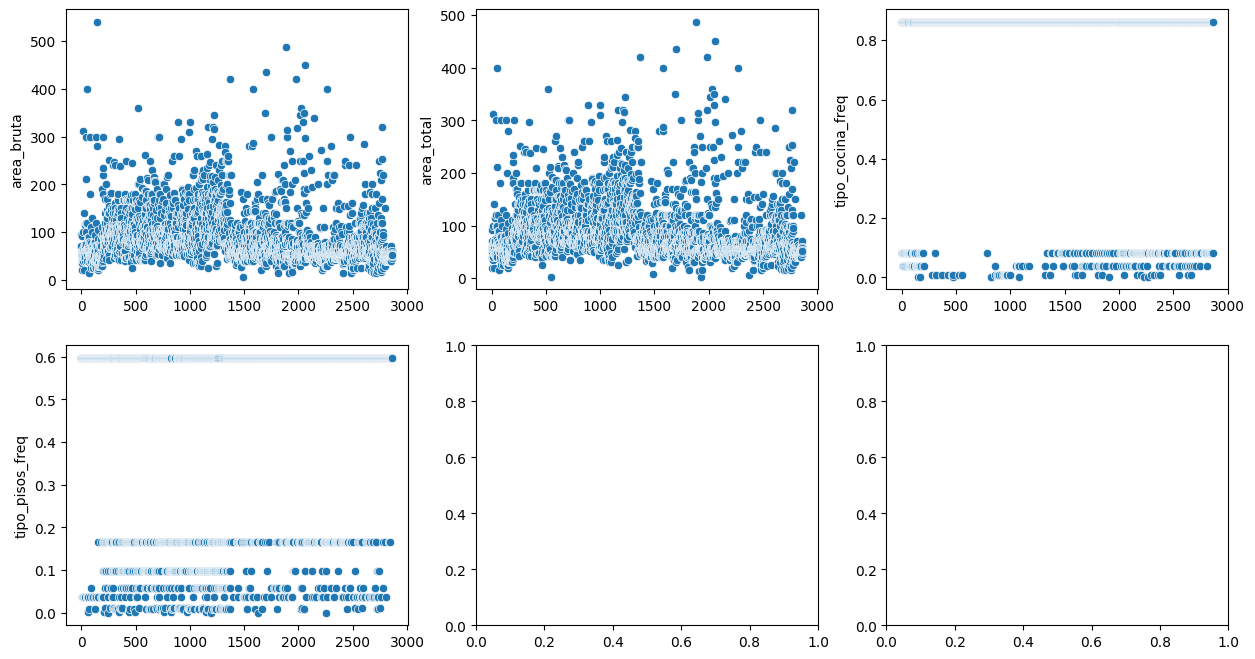

In [15]:
plot_dist(X, num_features, "dist")

### Categóricas numéricas

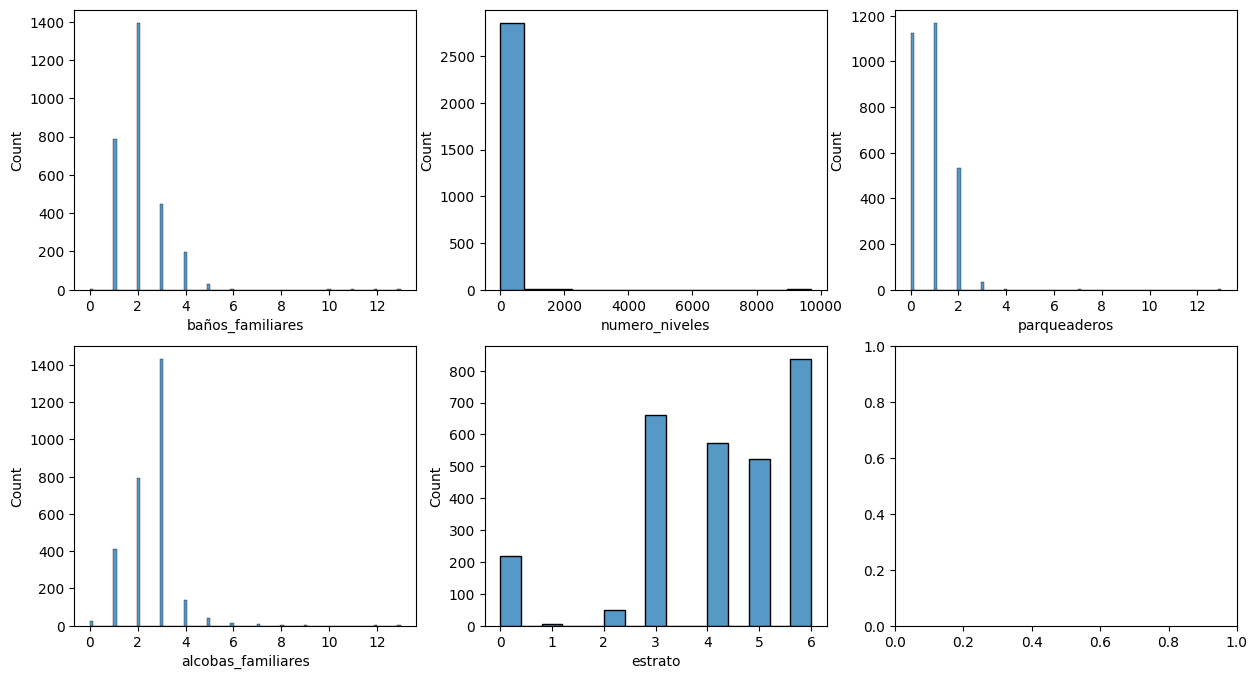

In [16]:
plot_dist(X, cat_number_fetures)

In [17]:
for cat in cat_number_fetures:
    print((X.groupby(cat).size()/X.shape[0])*100)
    print('\n')

baños_familiares
0.0      0.174581
1.0     27.409218
2.0     48.673184
3.0     15.572626
4.0      6.808659
5.0      1.082402
6.0      0.069832
10.0     0.034916
11.0     0.069832
12.0     0.069832
13.0     0.034916
dtype: float64


numero_niveles
0.0        0.034916
1.0       92.842179
2.0        3.491620
3.0        0.977654
4.0        0.418994
5.0        0.174581
6.0        0.104749
7.0        0.209497
8.0        0.139665
9.0        0.104749
11.0       0.069832
12.0       0.069832
13.0       0.069832
14.0       0.034916
15.0       0.104749
16.0       0.069832
18.0       0.034916
19.0       0.069832
20.0       0.069832
21.0       0.034916
22.0       0.069832
23.0       0.034916
24.0       0.069832
25.0       0.034916
26.0       0.034916
141.0      0.034916
201.0      0.034916
301.0      0.034916
302.0      0.069832
402.0      0.034916
404.0      0.034916
447.0      0.034916
501.0      0.034916
710.0      0.034916
805.0      0.034916
1011.0     0.034916
1706.0     0.034916
1712.0     0.

baños_familiares
- 0.0     =  0.165180
- 1.0     = 26.362735
- 2.0     = 46.845061
- 3.0     = 15.725140
- 4.0     =  8.952759
- 5.0     =  1.552692
- 6.0     =  0.132144
- 7.0     =  0.033036
- 10.0    =  0.066072
- 11.0    =  0.066072
- 12.0    =  0.066072
- 13.0    =  0.033036

numero_niveles
- 0.0      =  0.033036
- 1.0      = 92.798150
- 2.0      =  3.700033
- 3.0      =  0.925008
- 4.0      =  0.396432
- 5.0      =  0.165180
- 6.0      =  0.099108
- 7.0      =  0.231252
- 8.0      =  0.132144
- 9.0      =  0.099108
- 11.0     =  0.066072
- 12.0     =  0.066072
- 13.0     =  0.066072
- 14.0     =  0.033036
- 15.0     =  0.099108
- 16.0     =  0.066072
- 18.0     =  0.033036
- 19.0     =  0.066072
- 20.0     =  0.066072
- 21.0     =  0.033036
- 22.0     =  0.066072
- 23.0     =  0.033036
- 24.0     =  0.066072
- 25.0     =  0.033036
- 26.0     =  0.033036
- 141.0    =  0.033036
- 201.0    =  0.033036
- 301.0    =  0.033036
- 302.0    =  0.066072
- 402.0    =  0.033036
- 404.0    =  0.033036
- 447.0    =  0.033036
- 501.0    =  0.033036
- 710.0    =  0.033036
- 805.0    =  0.033036
- 1011.0   =  0.033036
- 1706.0   =  0.033036
- 1712.0   =  0.033036
- 2003.0   =  0.033036
- 2012.0   =  0.033036
- 2113.0   =  0.033036
- 9703.0   =  0.033036

parqueaderos
- 0.0    = 37.694087
- 1.0    = 39.940535
- 2.0    = 20.052858
- 3.0    =  2.015197
- 4.0    =  0.231252
- 7.0    =  0.033036
- 13.0   =  0.033036

alcobas_familiares
- 0.0    =  0.759828
- 1.0    = 13.842088
- 2.0    = 26.825240
- 3.0    = 50.710274
- 4.0    =  5.318797
- 5.0    =  1.453584
- 6.0    =  0.429468
- 7.0    =  0.330360
- 8.0    =  0.132144
- 9.0    =  0.033036
- 10.0   =  0.033036
- 12.0   =  0.099108
- 13.0   =  0.033036
dtype: float64


estrato
- 0.0   =  7.267922
- 1.0   =  0.165180
- 2.0   =  1.717872
- 3.0   = 21.902874
- 4.0   = 19.127849
- 5.0   = 17.938553
- 6.0   = 31.879749
dtype: float64

### Categóricas

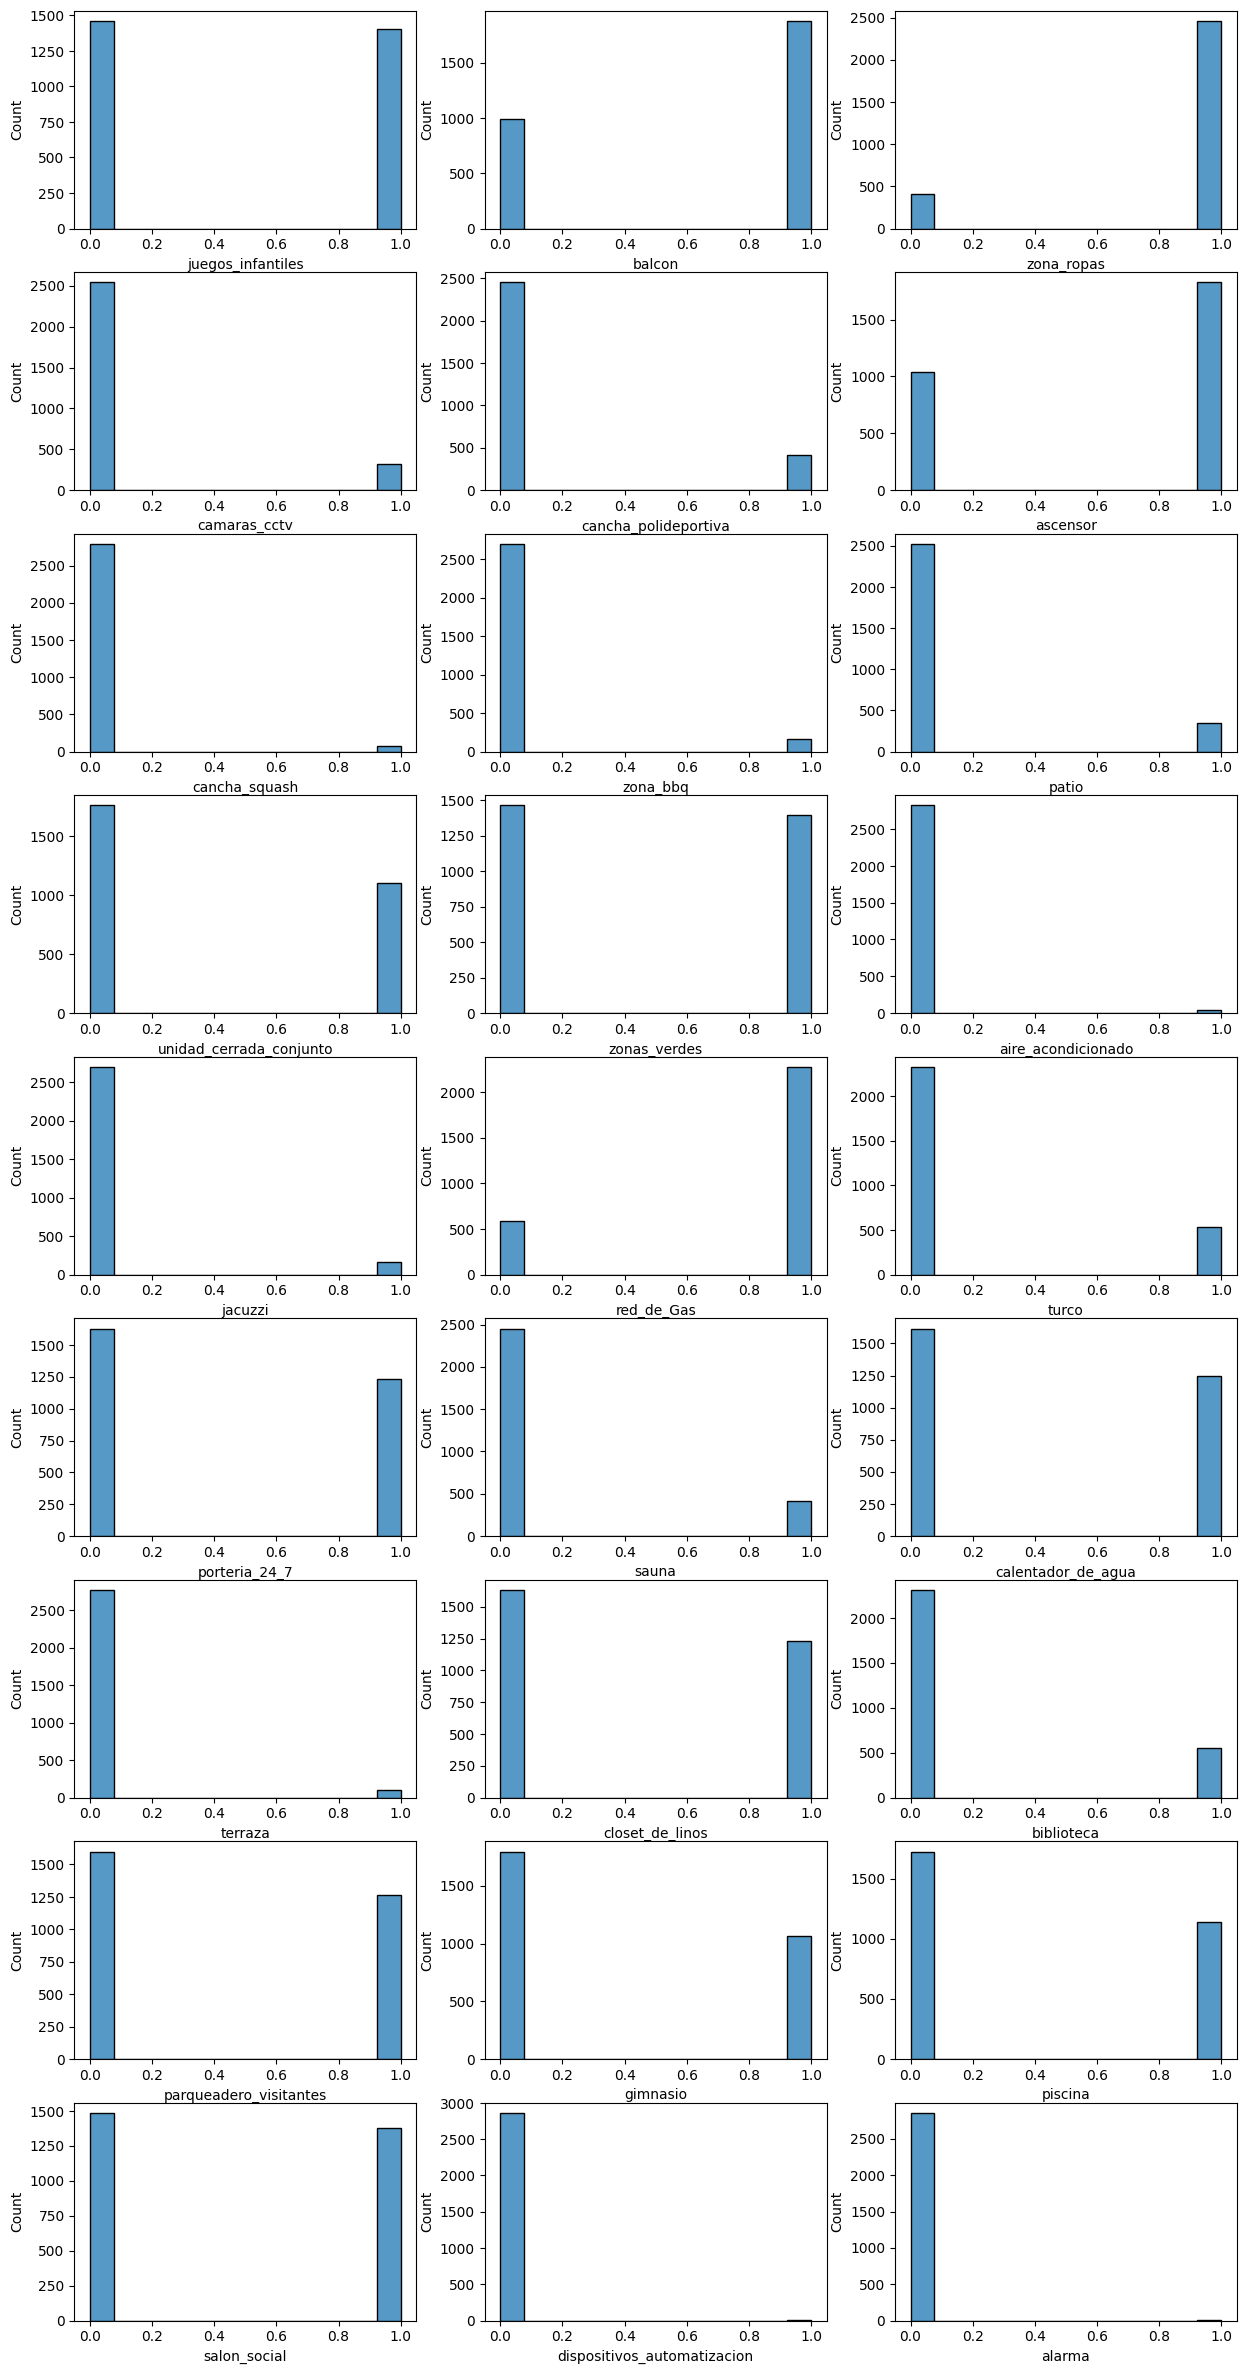

In [18]:
plot_dist(X, cat_features, fig_zise=(15,30), num_rows=9)

In [19]:
for cat in cat_features:
    print((X.groupby(cat).size()/X.shape[0])*100)
    print('\n')

juegos_infantiles
0.0    51.01257
1.0    48.98743
dtype: float64


balcon
0.0    34.462291
1.0    65.537709
dtype: float64


zona_ropas
0.0    14.106145
1.0    85.893855
dtype: float64


camaras_cctv
0.0    88.756983
1.0    11.243017
dtype: float64


cancha_polideportiva
0.0    85.649441
1.0    14.350559
dtype: float64


ascensor
0.0    36.173184
1.0    63.826816
dtype: float64


cancha_squash
0.0    97.416201
1.0     2.583799
dtype: float64


zona_bbq
0.0    94.238827
1.0     5.761173
dtype: float64


patio
0.0    88.093575
1.0    11.906425
dtype: float64


unidad_cerrada_conjunto
0.0    61.522346
1.0    38.477654
dtype: float64


zonas_verdes
0.0    51.117318
1.0    48.882682
dtype: float64


aire_acondicionado
0.0    98.53352
1.0     1.46648
dtype: float64


jacuzzi
0.0    94.099162
1.0     5.900838
dtype: float64


red_de_Gas
0.0    20.49581
1.0    79.50419
dtype: float64


turco
0.0    81.25
1.0    18.75
dtype: float64


porteria_24_7
0.0    56.913408
1.0    43.086592
dtype: float

Variables desbalanceadas

zona_ropas
- 0.0    = 13.90816
- 1.0    = 86.09184

camaras_cctv
- 0.0    = 88.272217
- 1.0    = 11.727783

cancha_polideportiva
- 0.0    = 85.629336
- 1.0    = 14.370664

cancha_squash
- 0.0    = 97.224975
- 1.0    = 2.775025

patio
- 0.0    = 88.272217
- 1.0    = 11.727783

aire_acondicionado
- 0.0    = 98.480344
- 1.0    =  1.519656

jacuzzi
- 0.0    = 93.987446
- 1.0    = 6.012554

red_de_Gas
- 0.0    = 20.746614
- 1.0    = 79.253386

turco
- 0.0    = 80.475719
- 1.0    = 19.524281

sauna
- 0.0    = 84.869508
- 1.0    = 15.130492

terraza
- 0.0    = 95.870499
- 1.0    = 4.129501

biblioteca
- 0.0   = 79.187314
- 1.0   = 20.812686

dispositivos_automatizacion
- 0.0   = 99.900892
- 1.0   =  0.099108

alarma
- 0.0    = 99.66964
- 1.0    = 0.33036

# Eliminacion de atípicos por variable individual

In [20]:
x_no_out = X[X['numero_niveles'] <= 3]
x_no_out = x_no_out[x_no_out['baños_familiares'] <= 5]
x_no_out = x_no_out[x_no_out['parqueaderos'] <= 3]
x_no_out = x_no_out[x_no_out['alcobas_familiares'] <= 5]
x_no_out = x_no_out[x_no_out['alcobas_familiares'] <= 5]
x_no_out.shape

(2751, 36)

In [21]:
y_no_out = Y.loc[x_no_out.index,:]

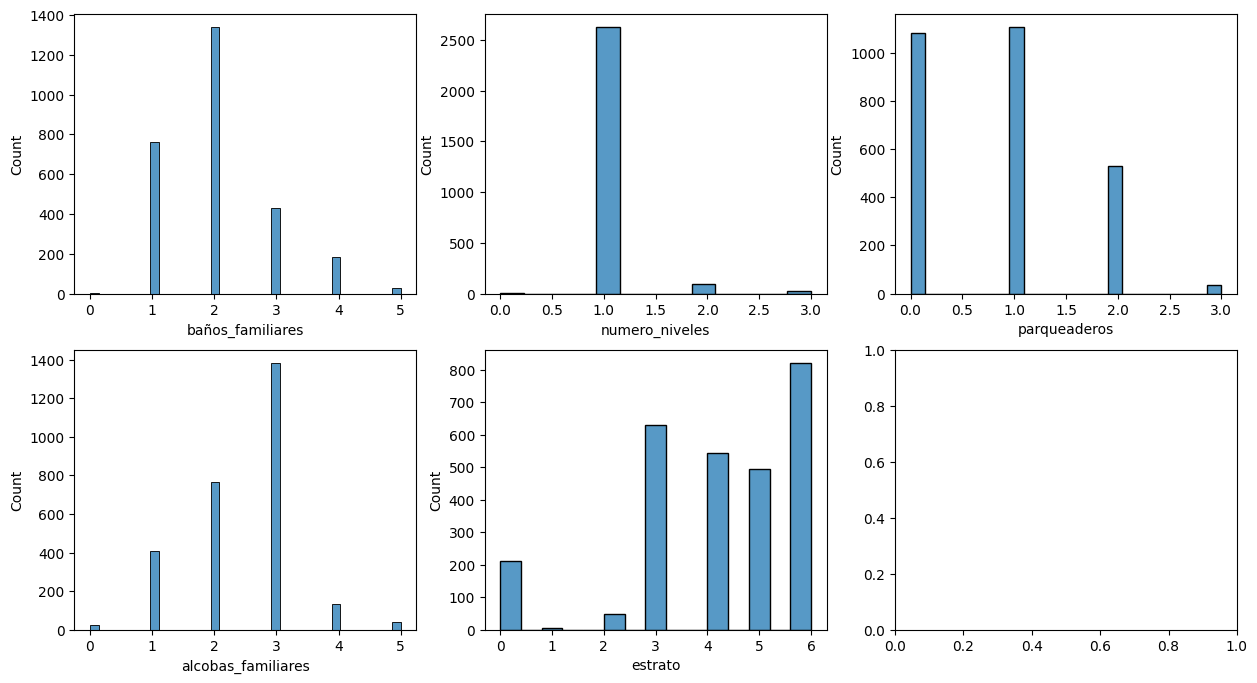

In [22]:
plot_dist(x_no_out, cat_number_fetures)

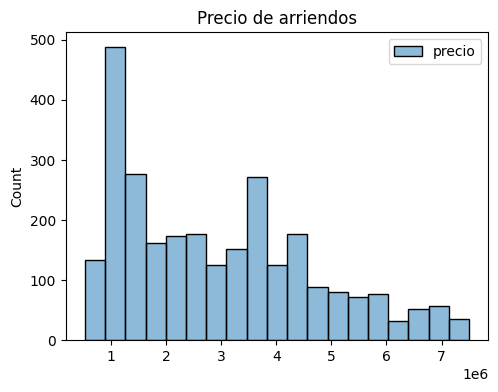

In [23]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('Precio de arriendos')
sns.histplot(y_no_out) 
plt.show()

### Estandarización de variables predictoras

In [24]:
scaler = MinMaxScaler(copy=True, feature_range=(0, 1)) # Método MinMax con valores entre 0 y 1
x_columns = X.columns
x_sclarer = scaler.fit_transform(x_no_out) # Transformación de los nuevos datos con una escala MinMax
x_sclarer = pd.DataFrame(x_sclarer, columns = x_columns)

In [25]:
x_sclarer.shape

(2751, 36)

## Correlación

### Correlación entre variables predictoras y variable salida

In [26]:
spearman = []
valor_p = []
for col in x_sclarer:
    s_valor, p_valor = spearmanr(x_sclarer[col], y_no_out)
    spearman.append(s_valor)
    valor_p.append(p_valor)

In [27]:
spearman = [abs(i) for i in spearman]

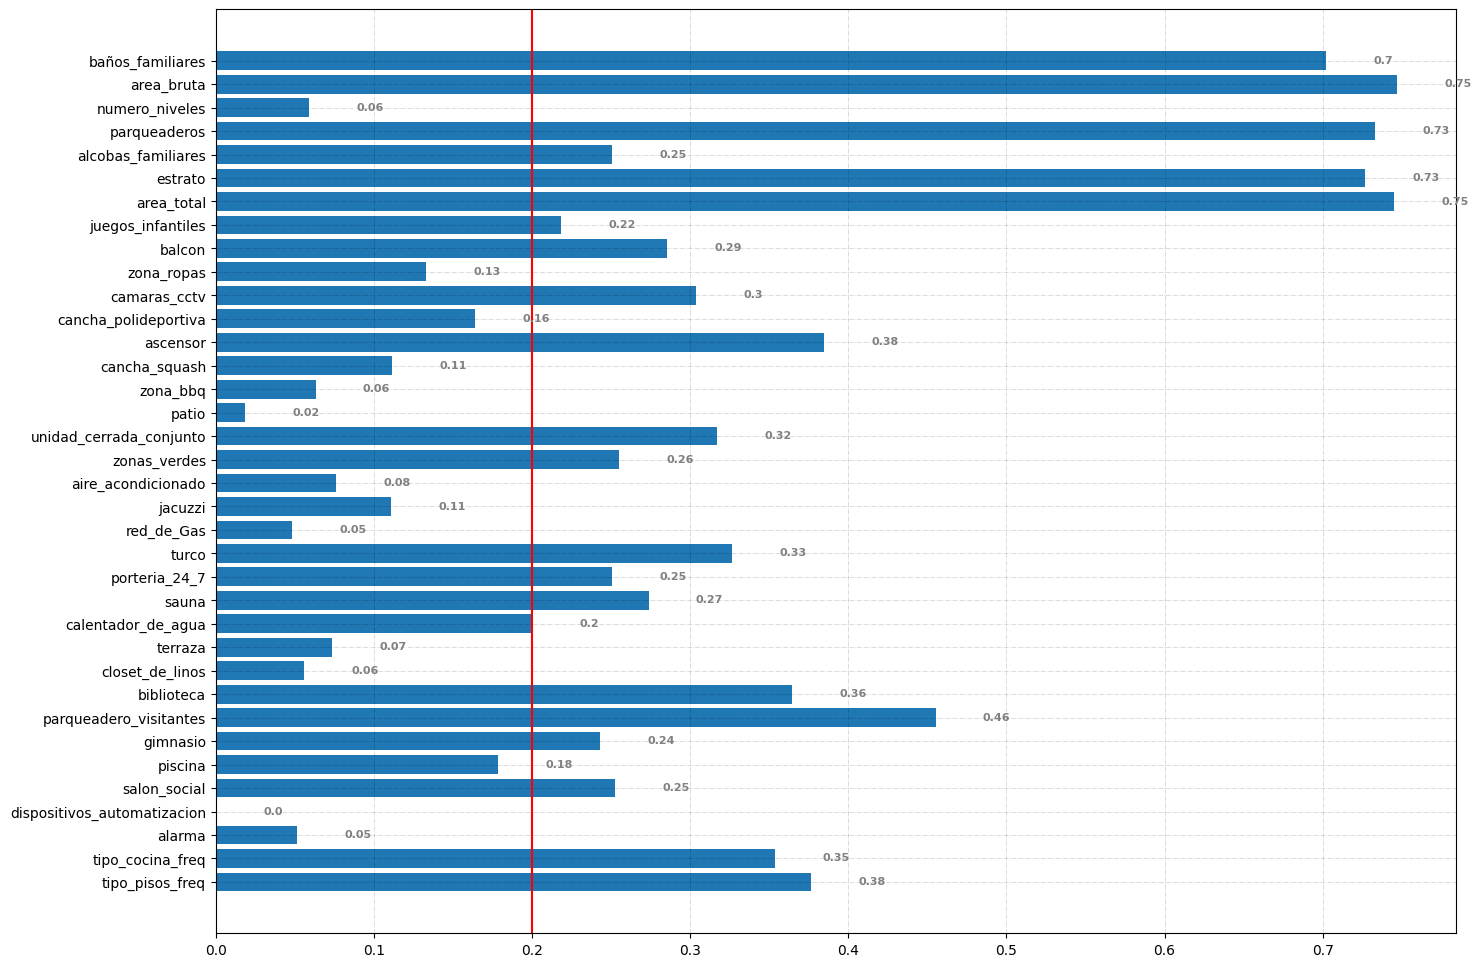

In [28]:
# Figure Size
fig, ax = plt.subplots(figsize =(16, 12))
# Horizontal Bar Plot
ax.barh(x_sclarer.columns, spearman)

# Add x, y gridlines
ax.grid( color ='black',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

# Show top values
ax.invert_yaxis()


# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.03, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 8, fontweight ='bold',
             color ='grey')


plt.axvline(0.2,0,1,label='correlation limit',c='red')
# Show Plot
plt.show()

In [29]:
# Variables a descartar} por correlación con variable final
columns_disc_corr = [
    "numero_niveles",
    "cancha_squash",
    "aire_acondicionado",
    "jacuzzi",
    "terraza",
    "dispositivos_automatizacion",
    "alarma",
    "red_de_Gas",
    "zona_ropas",
    "cancha_polideportiva",
    "zona_bbq",
    "patio"
]

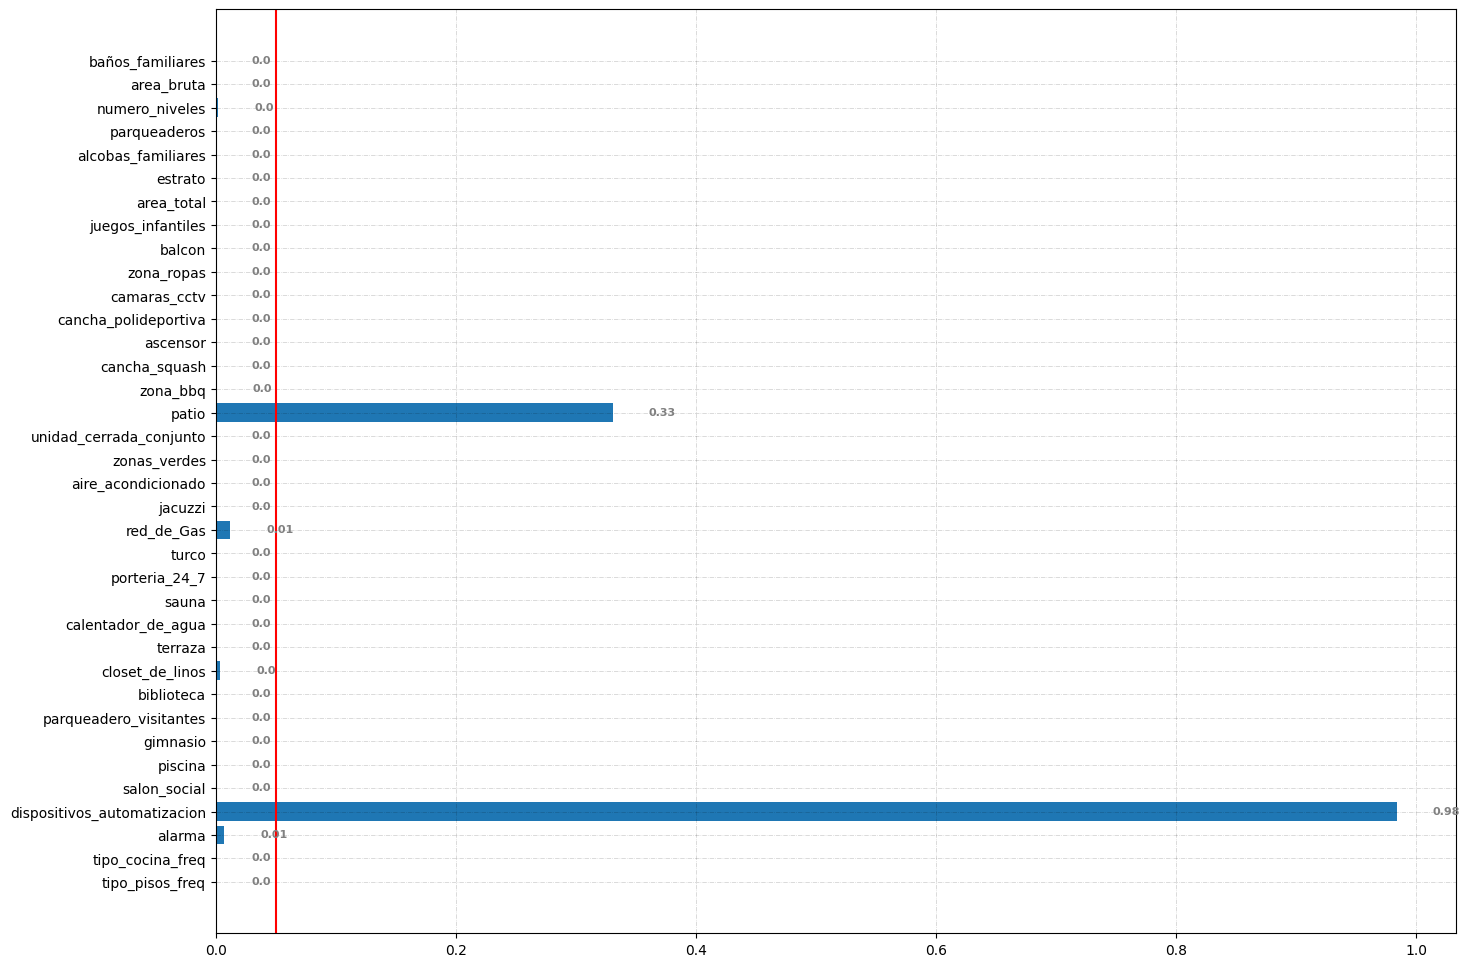

In [30]:
# Figure Size
fig, ax = plt.subplots(figsize =(16, 12))
# Horizontal Bar Plot
ax.barh(x_sclarer.columns, valor_p)

# Add x, y gridlines
ax.grid( color ='black',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

# Show top values
ax.invert_yaxis()


# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.03, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 8, fontweight ='bold',
             color ='grey')


plt.axvline(0.05,0,1,label='correlation limit',c='red')
# Show Plot
plt.show()

### Correlación entre variables predictoras

In [31]:
spearman_num = []
valor_p_num = []
data_num = x_sclarer.values
data_num = np.asanyarray(data_num)

for _,n in enumerate(np.arange(0,data_num.shape[1])):
  for _,m in enumerate(np.arange(0,data_num.shape[1])):  
      s_valor, p_valor = spearmanr(data_num[:,n], data_num[:,m])
      spearman_num.append(s_valor)
      valor_p_num.append(p_valor)

In [32]:
corr = 0
columns = list(x_sclarer.columns)
for i in columns:
    for j in columns:
        if spearman_num[corr] >= 0.7 and i != j:
            print("{} vs {}: {}".format(i, j, spearman_num[corr]))
        corr += 1

baños_familiares vs area_bruta: 0.774596839284559
baños_familiares vs area_total: 0.772171911220186
area_bruta vs baños_familiares: 0.7745968392845589
area_bruta vs area_total: 0.9977924165867139
area_total vs baños_familiares: 0.772171911220186
area_total vs area_bruta: 0.9977924165867139
juegos_infantiles vs zonas_verdes: 0.7178837932100675
juegos_infantiles vs salon_social: 0.7295516077123261
unidad_cerrada_conjunto vs porteria_24_7: 0.8099172713758526
zonas_verdes vs juegos_infantiles: 0.7178837932100675
porteria_24_7 vs unidad_cerrada_conjunto: 0.8099172713758525
salon_social vs juegos_infantiles: 0.7295516077123261


#### Correlación Numéricas

In [33]:
spearman_num = []
valor_p_num = []
data_num = x_sclarer[num_features].values
data_num = np.asanyarray(data_num)

for _,n in enumerate(np.arange(0,data_num.shape[1])):
  for _,m in enumerate(np.arange(0,data_num.shape[1])):  
      s_valor, p_valor = spearmanr(data_num[:,n], data_num[:,m])
      spearman_num.append(s_valor)
      valor_p_num.append(p_valor)

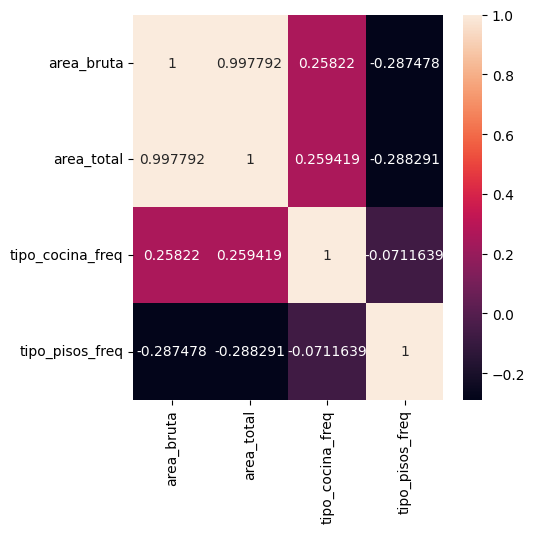

In [34]:
spearman_num = np.asarray(spearman_num)
valor_p_num = np.asarray(valor_p_num)

spearman_r = spearman_num.reshape(data_num.shape[1],data_num.shape[1])
p_value = valor_p_num.reshape(data_num.shape[1],data_num.shape[1])

plt.figure(figsize=(5,5))
ax = sns.heatmap(spearman_r, annot=True, fmt='g', xticklabels = num_features, yticklabels = num_features)
plt.show()

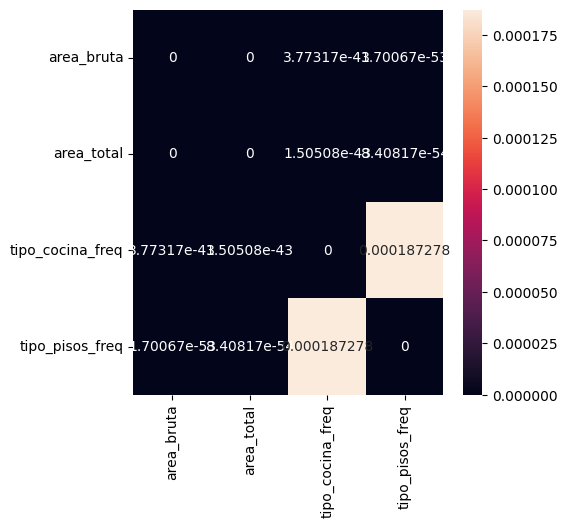

In [35]:
plt.figure(figsize=(5,5))
ax = sns.heatmap(p_value, annot=True, fmt='g', xticklabels = num_features, yticklabels = num_features)
plt.show()

Variables altamente correlacionadas:

- area_total - area_bruta: Valor de correlación alto y valor de p significativo

In [36]:
columns_disc_corr.append("area_total")

#### Correlación Numéricas Categóricas

In [37]:
spearman_num = []
valor_p_num = []
data_num = x_sclarer[cat_number_fetures].values
data_num = np.asanyarray(data_num)

for _,n in enumerate(np.arange(0,data_num.shape[1])):
  for _,m in enumerate(np.arange(0,data_num.shape[1])):  
      s_valor, p_valor = spearmanr(data_num[:,n], data_num[:,m])
      spearman_num.append(s_valor)
      valor_p_num.append(p_valor)

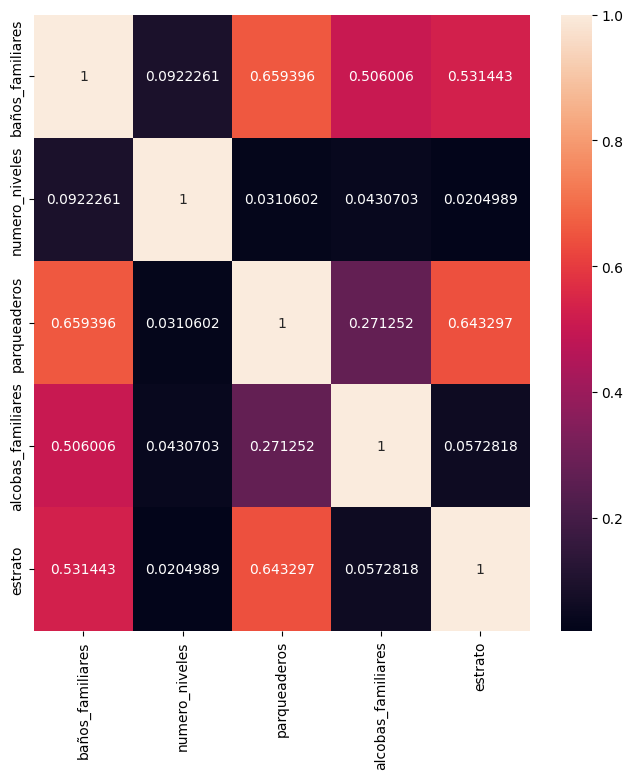

In [38]:
spearman_num = np.asarray(spearman_num)
valor_p_num = np.asarray(valor_p_num)

spearman_r = spearman_num.reshape(data_num.shape[1],data_num.shape[1])
p_value = valor_p_num.reshape(data_num.shape[1],data_num.shape[1])

plt.figure(figsize=(8,8))
ax = sns.heatmap(spearman_r, annot=True, fmt='g', xticklabels = cat_number_fetures, yticklabels = cat_number_fetures)
plt.show()

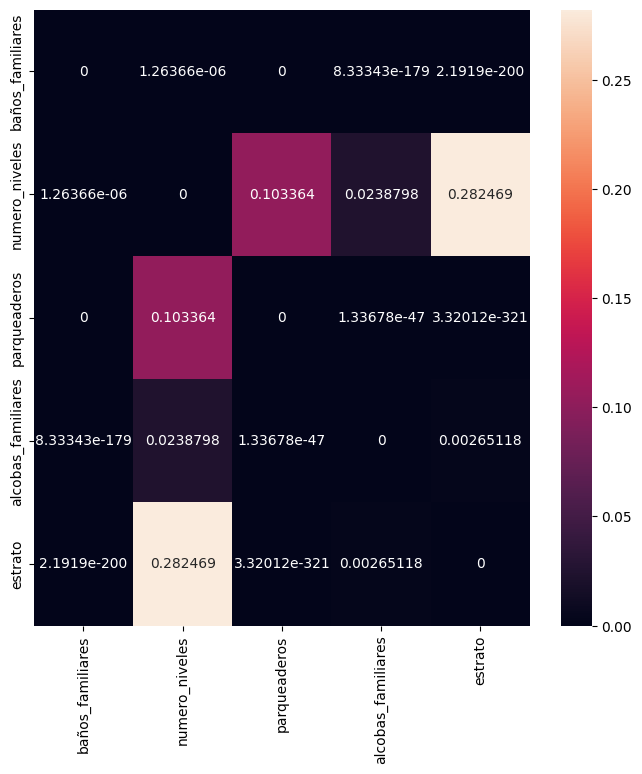

In [39]:
plt.figure(figsize=(8,8))
ax = sns.heatmap(p_value, annot=True, fmt='g', xticklabels = cat_number_fetures, yticklabels = cat_number_fetures)
plt.show()

NO se optiene variables altamente correlacionadas, sin embargo queda pendiente explorar métodos de correlación de variables categóricas

#### Correlación categoricas

In [40]:
spearman_num = []
valor_p_num = []
data_num = x_sclarer[cat_features].values
data_num = np.asanyarray(data_num)

for _,n in enumerate(np.arange(0,data_num.shape[1])):
  for _,m in enumerate(np.arange(0,data_num.shape[1])):  
      s_valor, p_valor = spearmanr(data_num[:,n], data_num[:,m])
      spearman_num.append(s_valor)
      valor_p_num.append(p_valor)

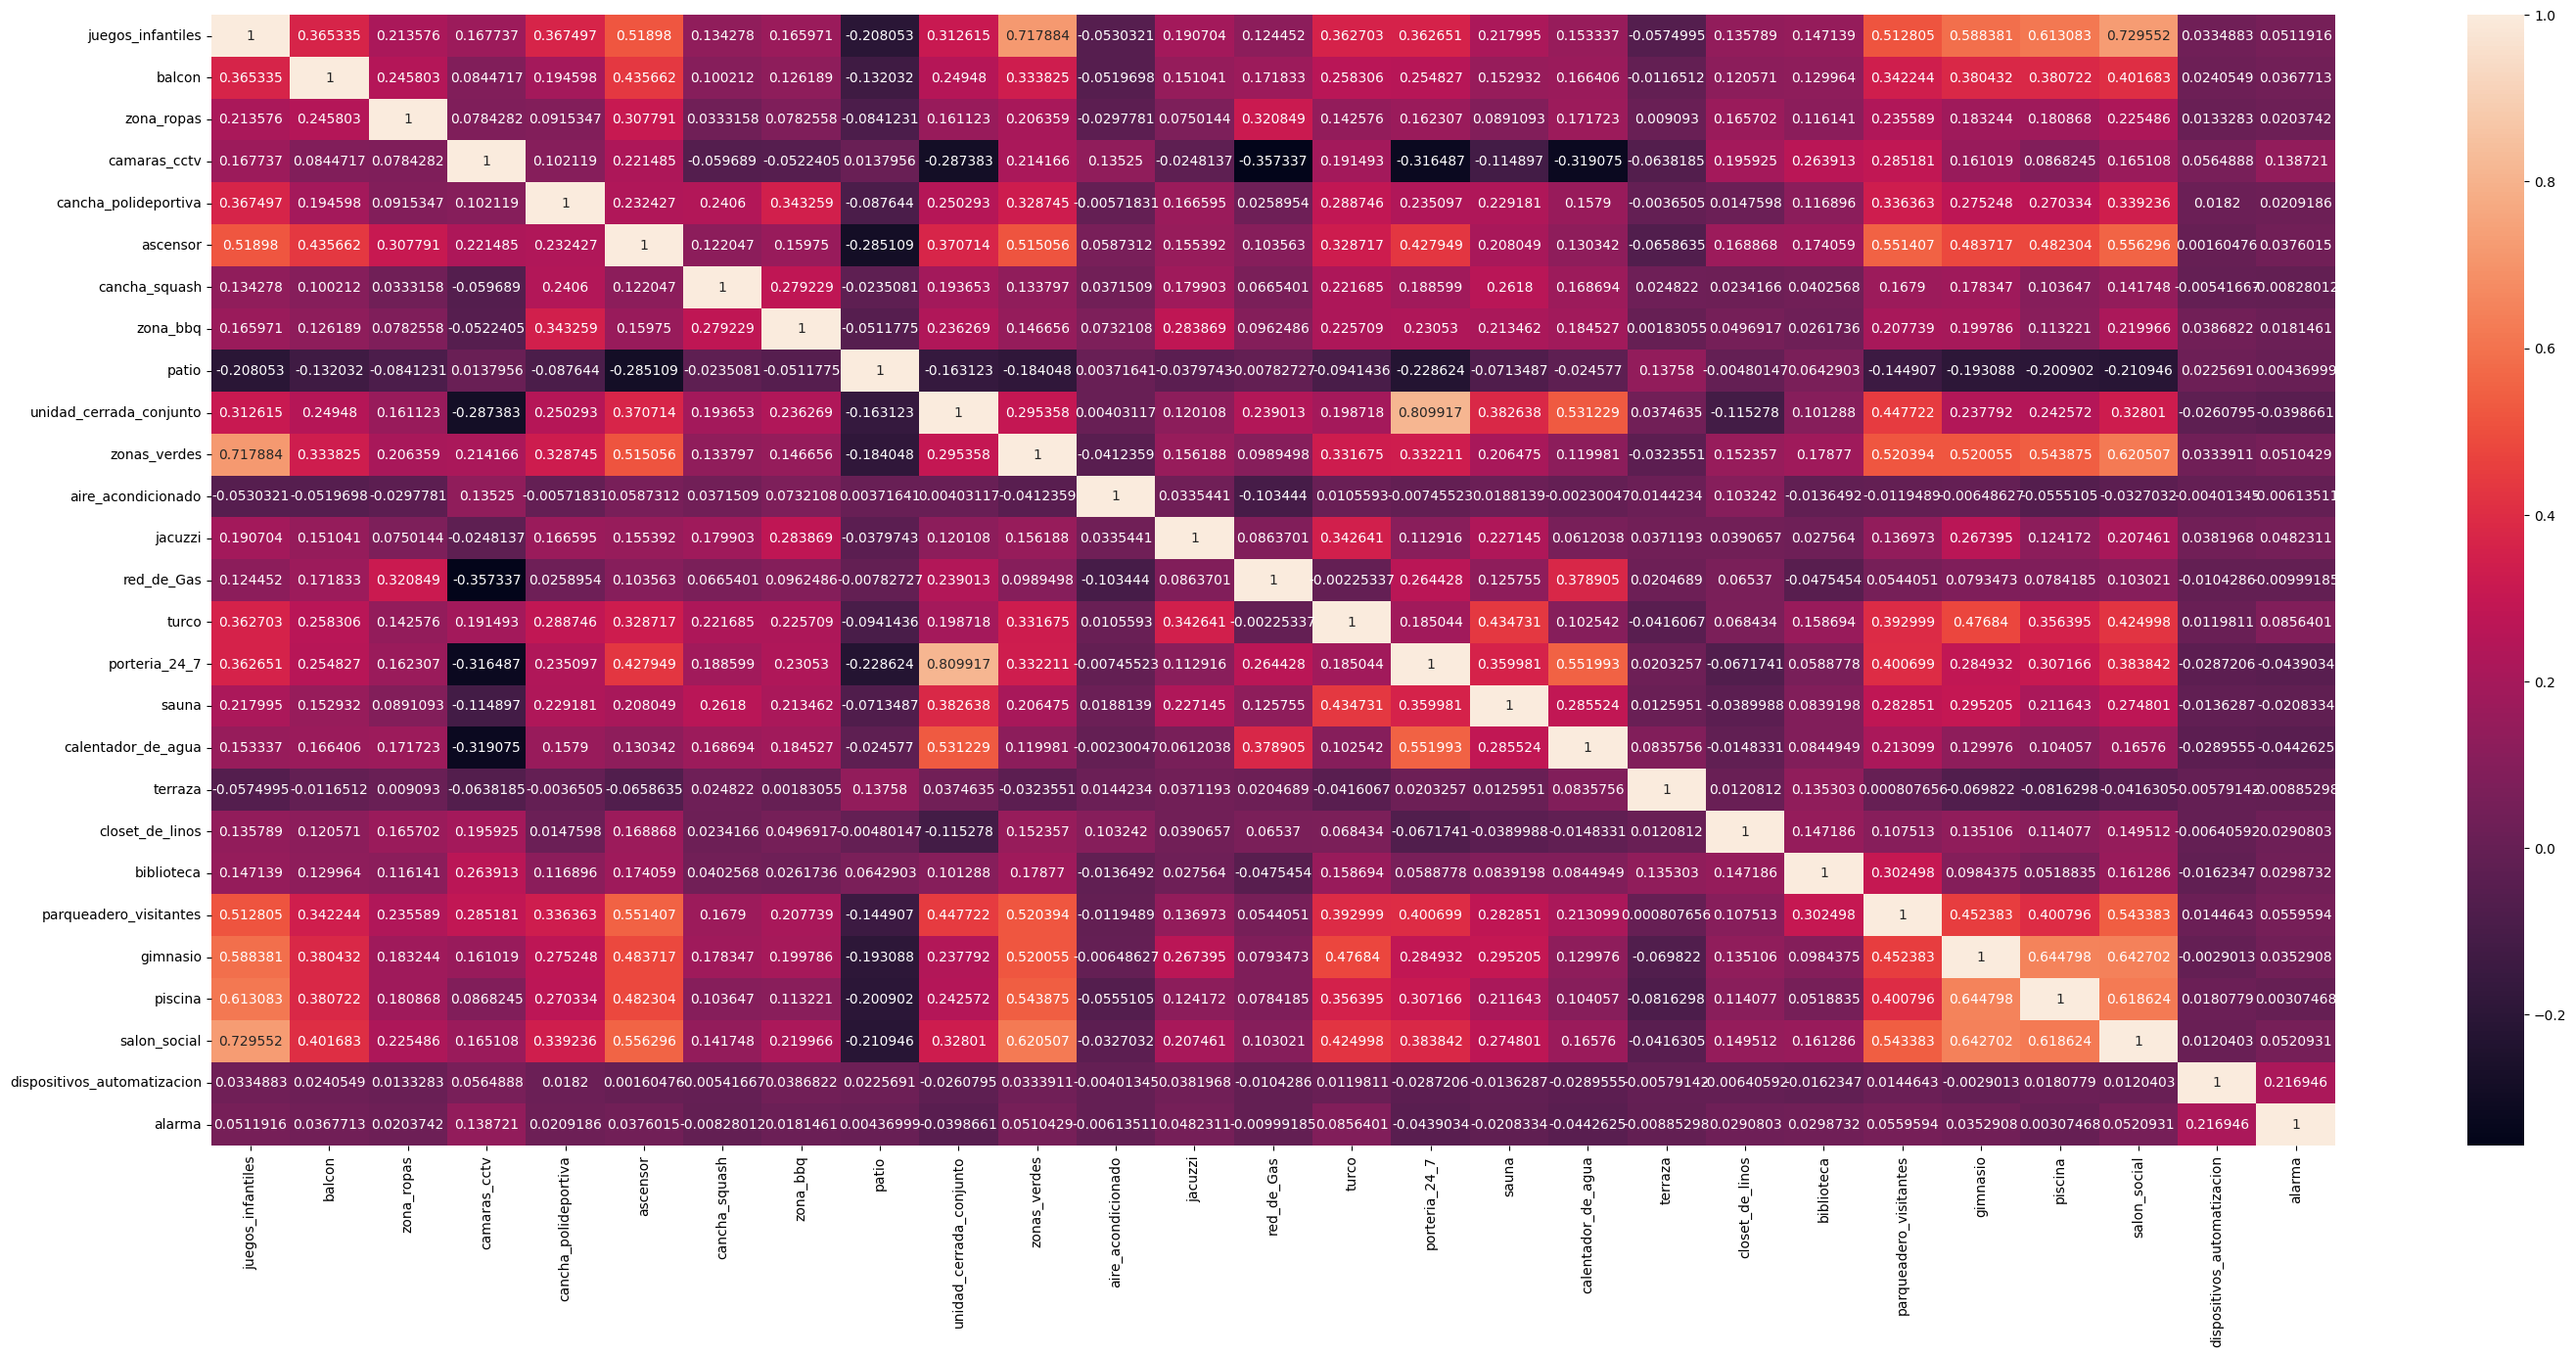

In [41]:
spearman_num = np.asarray(spearman_num)
valor_p_num = np.asarray(valor_p_num)

spearman_r = spearman_num.reshape(data_num.shape[1],data_num.shape[1])
p_value = valor_p_num.reshape(data_num.shape[1],data_num.shape[1])

plt.figure(figsize=(35,15))
ax = sns.heatmap(spearman_r, annot=True, fmt='g', xticklabels = cat_features, yticklabels = cat_features)
plt.show()

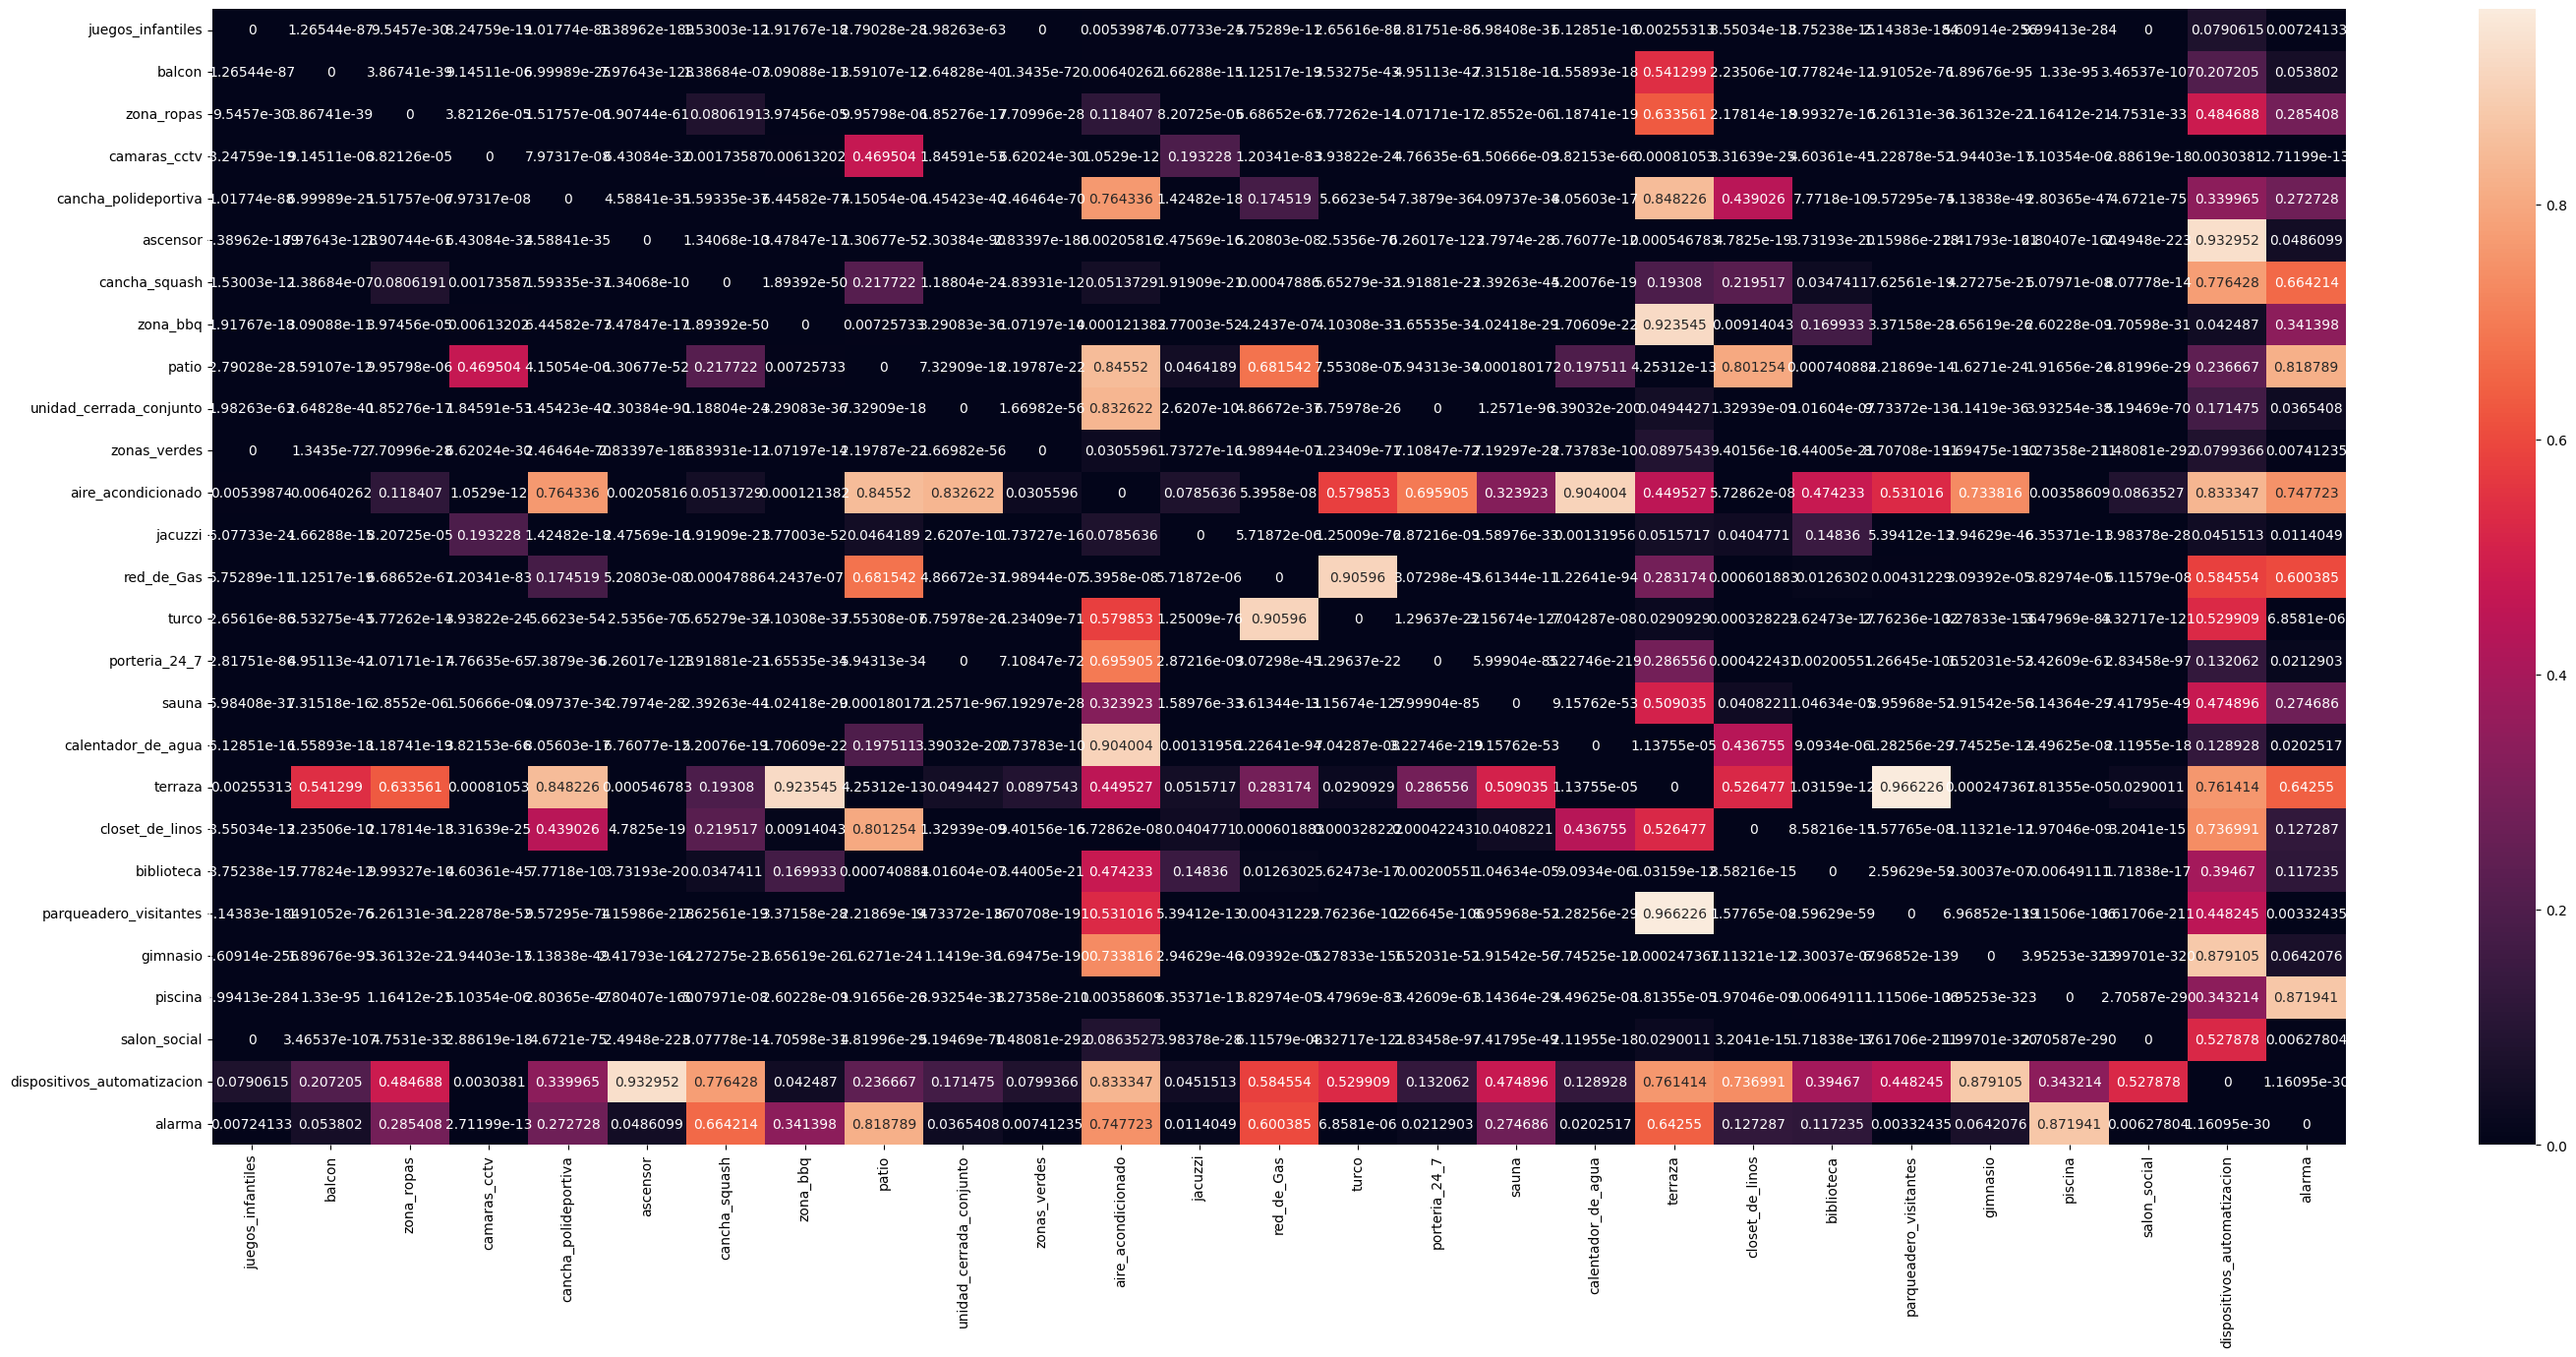

In [42]:
plt.figure(figsize=(35,15))
ax = sns.heatmap(p_value, annot=True, fmt='g', xticklabels = cat_features, yticklabels = cat_features)
plt.show()

Correlacion entre variables:
- zonas_verdes - juegos_infantiles
- juegos_infantiles - salon social
- unidad_cerrada_conjunto - porteria_24_7

In [43]:
columns_disc_corr.append("porteria_24_7")

#### Correlación Categóricas

## División de los datos

In [44]:
columns_disc_corr

['numero_niveles',
 'cancha_squash',
 'aire_acondicionado',
 'jacuzzi',
 'terraza',
 'dispositivos_automatizacion',
 'alarma',
 'red_de_Gas',
 'zona_ropas',
 'cancha_polideportiva',
 'zona_bbq',
 'patio',
 'area_total',
 'porteria_24_7']

In [45]:
x_model = x_sclarer.drop(columns = columns_disc_corr)
y_model = y_no_out
x_model.shape, y_model.shape

((2751, 22), (2751, 1))

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x_model, y_model, test_size = 0.30, train_size = 0.70, random_state = 17)
print("Tamaño de los Datos de Entrenamiento = ", x_train.shape)
print("Tamaño de los Datos de Validación = ", x_test.shape)
print("Tamaño del Vector de Clases de Entrenamiento = ", y_train.shape)
print("Tamaño del Vector de Clases de Prueba = ", y_test.shape)

Tamaño de los Datos de Entrenamiento =  (1925, 22)
Tamaño de los Datos de Validación =  (826, 22)
Tamaño del Vector de Clases de Entrenamiento =  (1925, 1)
Tamaño del Vector de Clases de Prueba =  (826, 1)


# Modelo

## Random Forest

In [47]:
y_train.values.reshape(-1,1).shape

(1925, 1)

In [48]:
# Grid de hiperparámetros evaluados
# ==============================================
# ================================
param_grid = ParameterGrid(
                {'n_estimators': [40, 45 ,50, 60, 70, 100],
                 'max_features': [3,5,7,10],
                 'max_depth'   : [3, 5, 7, 10, 15]
                }
             )

# Loop para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
resultados = {'params': [], 'oob_r2': [], 'R2_train': [], 'R2_test' : []}

for params in param_grid:
    
    modelo = RandomForestRegressor(
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123,
                ** params
             )
    
    modelo.fit(x_train, np.ravel(y_train,order='C'))
    
    
    resultados['params'].append(params)
    resultados['oob_r2'].append(modelo.oob_score_)
    resultados['R2_train'].append(modelo.score(x_train, y_train))
    resultados['R2_test'].append(modelo.score(x_test, y_test))
    print(f"Modelo: {params}")

# Resultados
# ==============================================================================
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
resultados = resultados.drop(columns = 'params')
resultados["diff"] = abs(resultados['R2_train'] - resultados['R2_test'])
resultados = resultados.sort_values('diff')
resultados.head()

Modelo: {'max_depth': 3, 'max_features': 3, 'n_estimators': 40}
Modelo: {'max_depth': 3, 'max_features': 3, 'n_estimators': 45}
Modelo: {'max_depth': 3, 'max_features': 3, 'n_estimators': 50}
Modelo: {'max_depth': 3, 'max_features': 3, 'n_estimators': 60}
Modelo: {'max_depth': 3, 'max_features': 3, 'n_estimators': 70}
Modelo: {'max_depth': 3, 'max_features': 3, 'n_estimators': 100}
Modelo: {'max_depth': 3, 'max_features': 5, 'n_estimators': 40}
Modelo: {'max_depth': 3, 'max_features': 5, 'n_estimators': 45}
Modelo: {'max_depth': 3, 'max_features': 5, 'n_estimators': 50}
Modelo: {'max_depth': 3, 'max_features': 5, 'n_estimators': 60}
Modelo: {'max_depth': 3, 'max_features': 5, 'n_estimators': 70}
Modelo: {'max_depth': 3, 'max_features': 5, 'n_estimators': 100}
Modelo: {'max_depth': 3, 'max_features': 7, 'n_estimators': 40}
Modelo: {'max_depth': 3, 'max_features': 7, 'n_estimators': 45}
Modelo: {'max_depth': 3, 'max_features': 7, 'n_estimators': 50}
Modelo: {'max_depth': 3, 'max_features

oob_r2  R2_train   R2_test  max_depth  max_features  n_estimators   
17  0.701571  0.716644  0.715568          3             7           100  \
15  0.698396  0.716810  0.714631          3             7            60   
6   0.678004  0.696199  0.698713          3             5            40   
16  0.700144  0.718021  0.715224          3             7            70   
14  0.698704  0.717496  0.714345          3             7            50   

        diff  
17  0.001077  
15  0.002179  
6   0.002514  
16  0.002796  
14  0.003151

Se tabulan los resultados para elegir la mejor combinación de parámetros de acuerdo a la métrica R2

In [49]:
resultados.to_csv("RandomForestRegressor_grid.csv",index=False)

## Importancia de variables

In [50]:
rf = RandomForestRegressor( oob_score    = True,
                            n_jobs       = -1,
                            random_state = 123,
                            max_depth    = 7,
                            max_features = 5, 
                            n_estimators = 50)
rf.fit(x_train, y_train)

C:\Users\user\AppData\Local\Temp\ipykernel_16200\720216820.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


RandomForestRegressor(max_depth=7, max_features=5, n_estimators=50, n_jobs=-1,
                      oob_score=True, random_state=123)

In [51]:
print('R^2 Training Score: {:.2f} \nOOB Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(rf.score(x_train, y_train), 
                                                                                             rf.oob_score_,
                                                                                             rf.score(x_test, y_test)))

R^2 Training Score: 0.84 
OOB Score: 0.76 
R^2 Validation Score: 0.78


In [52]:
from sklearn.metrics import r2_score
from rfpimp import permutation_importances

def r2(rf, x_train, y_train):
    return r2_score(y_train, rf.predict(x_train))

perm_imp_rfpimp = permutation_importances(rf, x_train, y_train, r2)

In [53]:
perm_imp_rfpimp

Importance
Feature                            
area_bruta                 0.246116
estrato                    0.195405
parqueaderos               0.090876
baños_familiares           0.076006
tipo_pisos_freq            0.023351
unidad_cerrada_conjunto    0.018925
ascensor                   0.015593
alcobas_familiares         0.014681
camaras_cctv               0.014202
sauna                      0.011540
parqueadero_visitantes     0.008673
biblioteca                 0.008041
calentador_de_agua         0.006704
tipo_cocina_freq           0.004863
zonas_verdes               0.004776
turco                      0.004267
balcon                     0.003547
gimnasio                   0.003472
salon_social               0.003282
piscina                    0.003194
closet_de_linos            0.003010
juegos_infantiles          0.002842

Los coeficientes positivos indican que predicen una tendencia creciente y los coeficientes negativos indican que predicen una tendencia decreciente de la variable de salida del modelo.

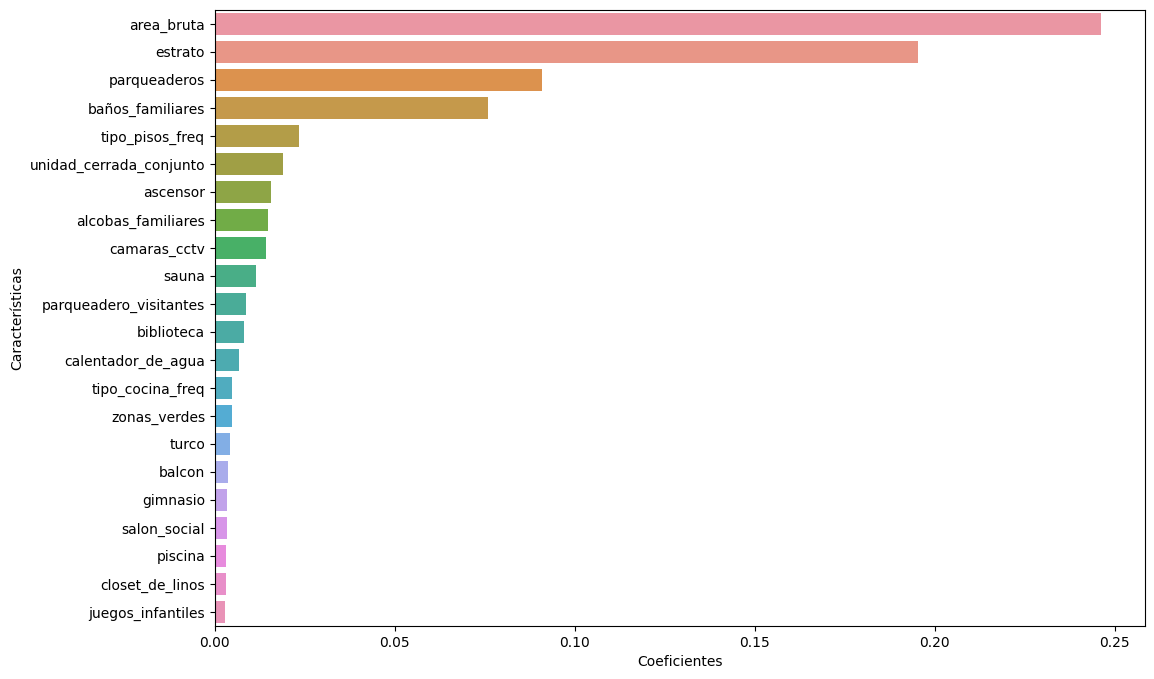

In [54]:
imp = perm_imp_rfpimp.values
imp = np.squeeze(np.asarray(imp))

#matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
fig = plt.figure(figsize=(12,8))

sns.barplot(y = perm_imp_rfpimp.index, x = imp.T)
plt.xlabel("Coeficientes")
plt.ylabel("Características")
plt.show()

# Validación

In [55]:
# Error de test del modelo 
# ==============================================================================
rf_predictions = rf.predict(x_test)


mse = mean_squared_error(y_true=y_test.values, y_pred=rf_predictions, squared=True)
rmse = mean_squared_error(y_true=y_test, y_pred=rf_predictions, squared=False)
MAE = mean_absolute_error(y_true=y_test, y_pred  = rf_predictions)
MedAE = median_absolute_error(y_true=y_test, y_pred  = rf_predictions)
mape = mean_absolute_percentage_error(y_true=y_test, y_pred  = rf_predictions)
r2 = r2_score(y_true=y_test, y_pred=rf_predictions)

print(f"El error MSE   de test es: {mse}")
print(f"El error RMSE  de test es: {rmse}")
print(f"El error MAE   de test es: {MAE}")
print(f"El error MedAE de test es: {MedAE}")
print(f"El error R2    de test es: {r2}")
print(f"El error MAPE    de test es: {mape}")

El error MSE   de test es: 672129997994.2396
El error RMSE  de test es: 819835.3480999948
El error MAE   de test es: 577805.5868816251
El error MedAE de test es: 386644.01227002987
El error R2    de test es: 0.7804768037332964
El error MAPE    de test es: 0.22981224218597449


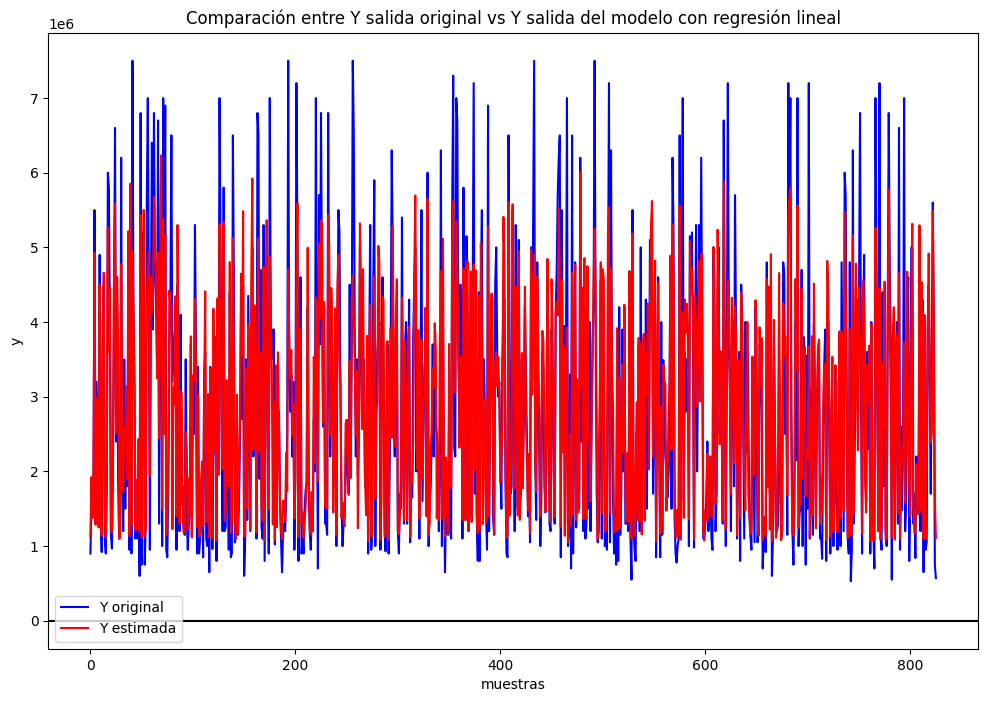

In [56]:
fig = plt.figure(figsize=(12,8))
line_1 = plt.plot(np.arange(len(y_test)), y_test, color = 'blue', label='Y original') 
line_2 = plt.plot(np.arange(len(y_test)), rf_predictions, color = 'red', label='Y estimada') 
plt.axhline(0, color="black") # Elegir color de la linea horizontal de referencia
plt.legend()
plt.title('Comparación entre Y salida original vs Y salida del modelo con regresión lineal') # Titulo de la gráfica
plt.xlabel('muestras') # Etiqueta del eje x
plt.ylabel('y') # Etiqueta del eje y

plt.show() # Mostrar gráfica

In [66]:
rf_data_predictions = x_test.copy()     
rf_data_predictions['precio'] = y_test.values
rf_data_predictions['precio_pred'] = rf_predictions.astype('float')
rf_data_predictions.head()


baños_familiares  area_bruta  parqueaderos  alcobas_familiares   
2534               0.2    0.033771      0.000000                 0.2  \
153                0.4    0.118199      0.000000                 0.6   
2075               0.2    0.061914      0.000000                 0.2   
1051               0.2    0.056285      0.000000                 0.0   
790                0.4    0.238274      0.666667                 0.6   

       estrato  juegos_infantiles  balcon  camaras_cctv  ascensor   
2534  0.500000                0.0     0.0           0.0       0.0  \
153   0.000000                0.0     0.0           0.0       1.0   
2075  0.666667                0.0     0.0           0.0       0.0   
1051  0.833333                0.0     0.0           0.0       0.0   
790   1.000000                1.0     1.0           0.0       1.0   

      unidad_cerrada_conjunto  ...  closet_de_linos  biblioteca   
2534                      0.0  ...              0.0         0.0  \
153                       0.0  ...              0.0         0.0   
2075                      0.0  ...              0.0         0.0   
1051                      0.0  ...              0.0         0.0   
790                       1.0  ...              0.0         0.0   

      parqueadero_visitantes  gimnasio  piscina  salon_social   
2534                     0.0       0.0      0.0           0.0  \
153                      0.0       0.0      0.0           0.0   
2075                     0.0       0.0      0.0           0.0   
1051                     0.0       0.0      0.0           0.0   
790                      1.0       1.0      1.0           1.0   

      tipo_cocina_freq  tipo_pisos_freq     precio   precio_pred  
2534               1.0         1.000000   900000.0  1.134505e+06  
153                1.0         1.000000  1600000.0  1.923030e+06  
2075               1.0         1.000000  1650000.0  1.377584e+06  
1051               1.0         1.000000  1800000.0  2.060546e+06  
790                1.0         0.279021  5500000.0  4.930371e+06  

[5 rows x 24 columns]

In [67]:
rf_data_predictions.to_csv("RandomForestPredictions.csv", index=False)